# EDA & Visualization

1. Import packages

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2. Load csv

In [5]:
df = pd.read_csv("data_clean.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df

,GameName,Description,MetaScore,UserScore,ReleaseYear,Multiplayer,Rating,Developer,Genre,Action,...,Horror,Open-World,Puzzle,Racing,Role-Playing,Sci-Fi,Shooter,Sports,Strategy,Survival
0,Disco Elysium: The Final Cut,Disco Elysium - The Final Cut is the definitiv...,97,82,2021,False,M,ZA/UM,[Role-Playing],0,...,0,0,0,0,1,0,0,0,0,0
1,Half-Life 2,[Metacritic's 2004 PC Game of the Year] By ta...,96,92,2004,False,M,Valve Software,"[Sci-Fi, Shooter, Action, Arcade]",1,...,0,0,0,0,0,1,1,0,0,0
2,Grand Theft Auto V,Los Santos: a sprawling sun-soaked metropolis ...,96,78,2015,True,M,Rockstar North,[Open-World],0,...,0,1,0,0,0,0,0,0,0,0
3,Out of the Park Baseball 2007,[Metacritic's 2007 PC Game of the Year] OOTP ...,96,26,2006,True,E,Sports Interactive,[Sports],0,...,0,0,0,0,0,0,0,1,0,0
4,The Orange Box,Games included in The Orange Box compilation: ...,96,91,2007,True,M,Valve Software,"[Sci-Fi, Shooter, Action]",1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,A Bird Story,From the developer of To the Moon: A simple an...,66,70,2014,False,E,Freebird Games,"[Adventure, Action]",1,...,0,0,0,0,0,0,0,0,0,0
4166,Vikings: Wolves of Midgard,"Fear the wolves. They are cold, they are hungr...",66,69,2017,True,M,Games Farm,[Role-Playing],0,...,0,0,0,0,1,0,0,0,0,0
4167,Tom Clancy's HAWX 2,Tom Clancy’s H.A.W.X. 2 plunges fans into an e...,66,38,2010,True,T,Ubisoft,[Action],1,...,0,0,0,0,0,0,0,0,0,0
4168,99 Levels To Hell,99 Levels to Hell is a platform shooter with l...,66,71,2012,False,E,bom667,[Role-Playing],0,...,0,0,0,0,1,0,0,0,0,0


3. Charts

## Game Count By Genre (Pie Chart)

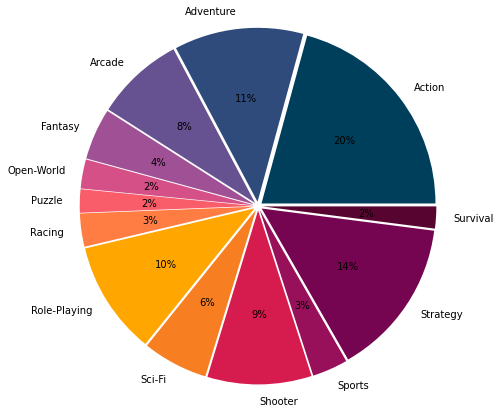

In [6]:
colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#F77E21','#D61C4E','#980F5A','#750550','#570530']
genres=['Action','Adventure','Arcade','Fantasy','Open-World','Puzzle','Racing','Role-Playing','Sci-Fi','Shooter','Sports','Strategy','Survival']
count_of_genres=[]
for genre in genres:
    count_of_genres.append(df[genre].sum())


plt.pie(count_of_genres, 
        labels = genres,
        autopct = "%d%%",
        explode = [0.05 for _ in genres],
        radius = 2,
        colors = colors)
plt.show()

## Game Count By Genre (Bar Chart)

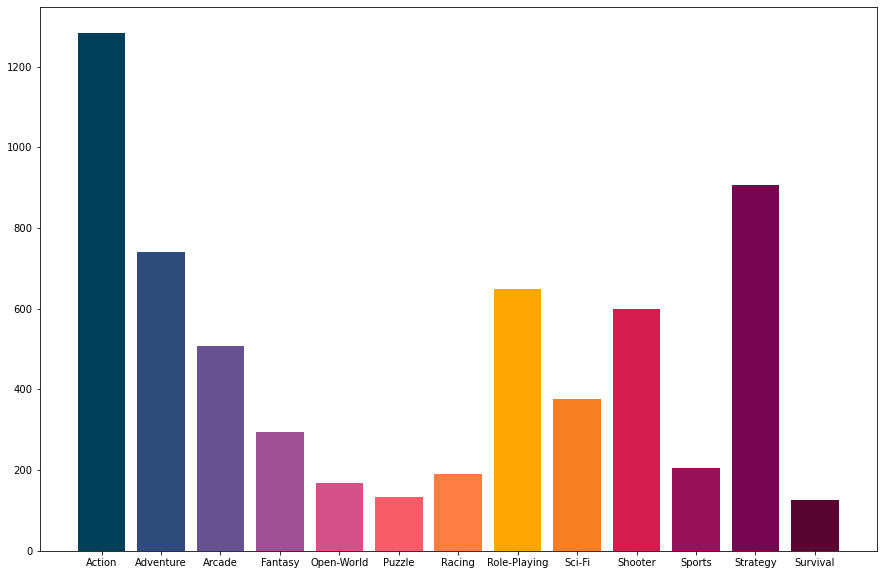

In [7]:
plt.figure(figsize=(15, 10))
plt.bar(genres,count_of_genres,color=colors)
plt.show()

## Meta Score Average By Genre

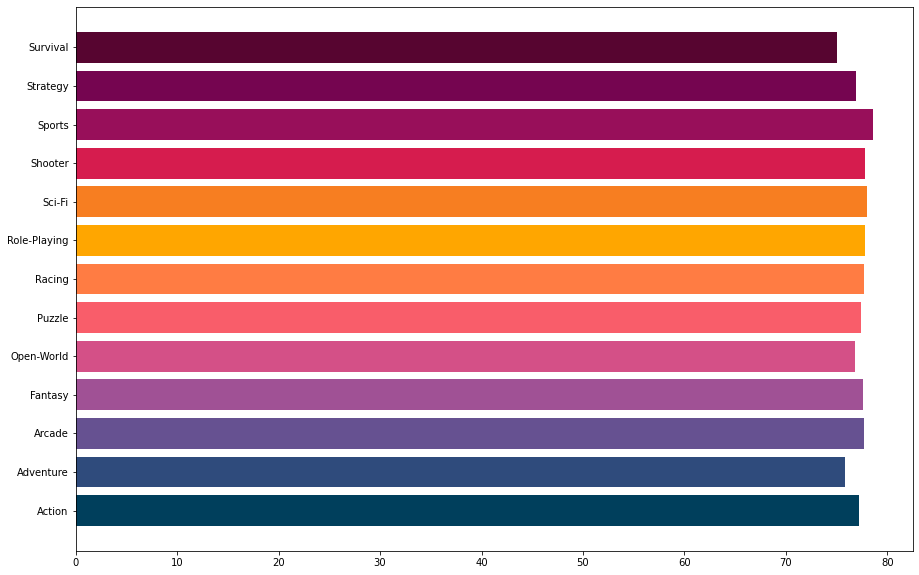

In [8]:
avg_of_genres_ms=[]
for genre in genres:
    avg_of_genres_ms.append(df.loc[df[genre] == 1]['MetaScore'].sum() / len(df.loc[df[genre] == 1]['MetaScore']))

    
plt.figure(figsize=(15, 10))
plt.barh(genres,avg_of_genres_ms, color=colors)


plt.show()

## User Score Average By Genre

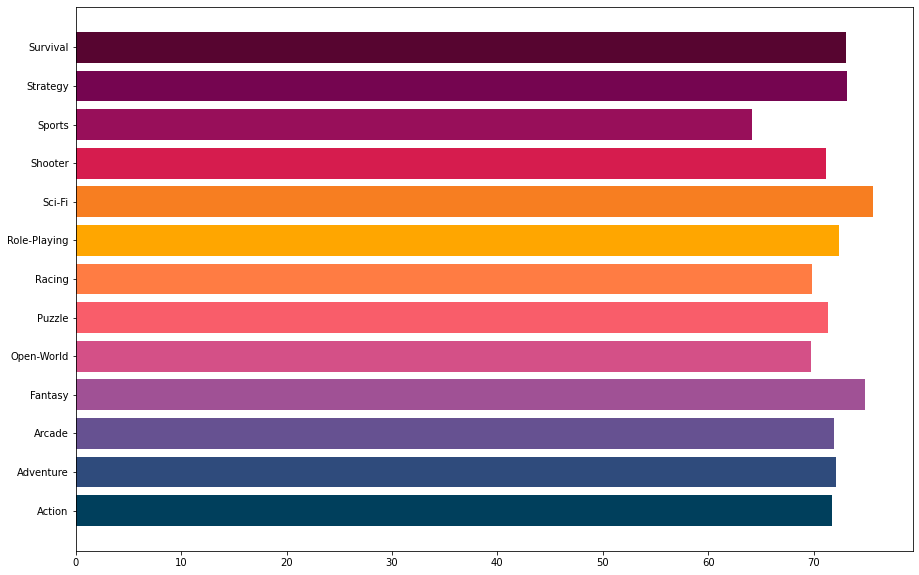

In [9]:
avg_of_genres_us=[]
for genre in genres:
    avg_of_genres_us.append(df.loc[df[genre] == 1]['UserScore'].sum() / len(df.loc[df[genre] == 1]['UserScore']))

    
plt.figure(figsize=(15, 10))
plt.barh(genres,avg_of_genres_us, color=colors)

plt.show()

## Games Count By Rating

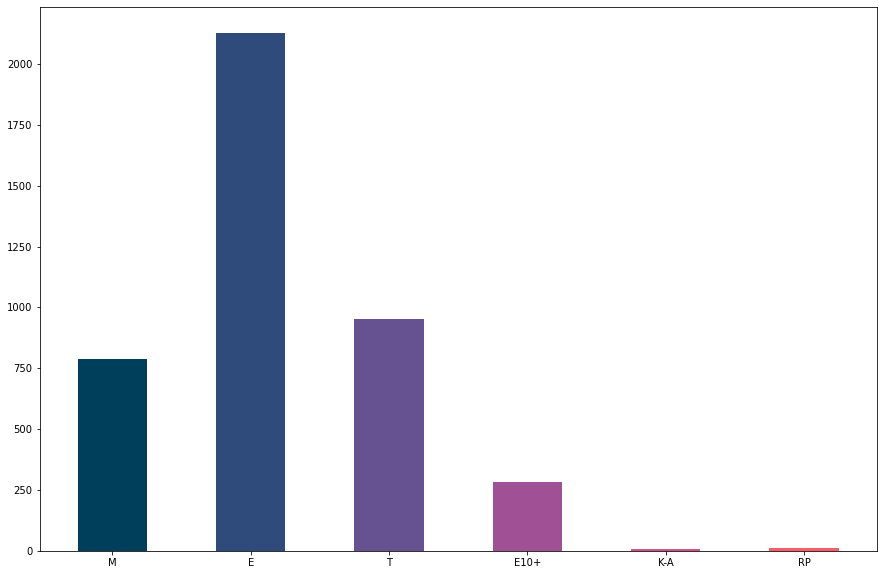

In [10]:
count_of_rating = df['Rating'].value_counts(sort=False).to_list()
rating = df['Rating'].unique()

    
plt.figure(figsize=(15, 10))
plt.bar(rating,count_of_rating, color=colors,width=0.5)

plt.show()

## Games Count By Multiplayer/SinglePlayer

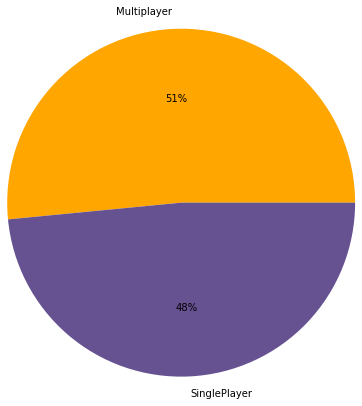

In [11]:
count_of_game_type = [df.loc[df["Multiplayer"] == 1]['MetaScore'].count(),df.loc[df["Multiplayer"] == 0]['MetaScore'].count()]
game_type =["Multiplayer","SinglePlayer"] 
colors2=["#ffa600","#665191"]

plt.pie(count_of_game_type, 
        labels = game_type,
        autopct = "%d%%",
        radius = 2,
        colors = colors2)
plt.show()

## Game Count By Release Year 

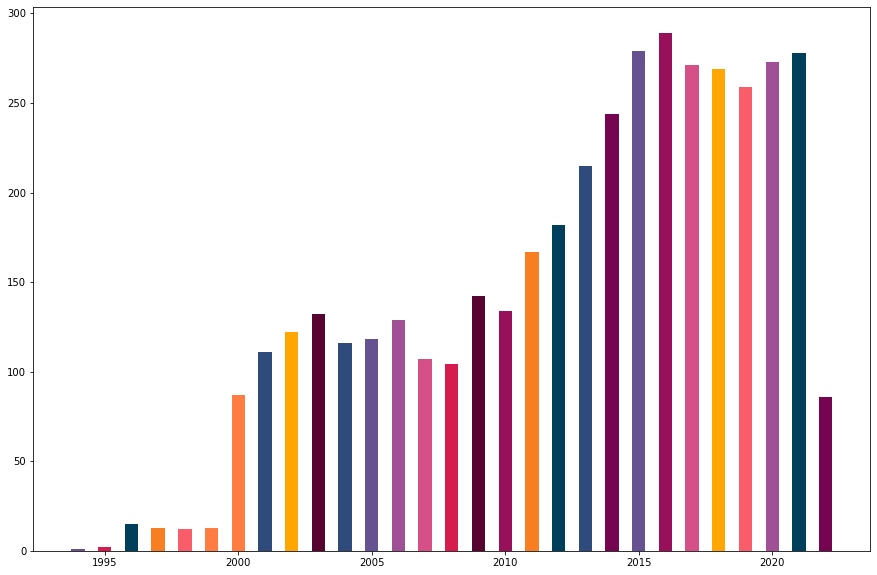

In [14]:
count_of_year = df['ReleaseYear'].value_counts(sort=False).to_list()
year = df['ReleaseYear'].unique()

    
plt.figure(figsize=(15, 10))
plt.bar(year,count_of_year, color=colors,width=0.5)

plt.show()

## Correlation Map

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MetaScore,UserScore,ReleaseYear,Multiplayer,Action,Adventure,Arcade,Fantasy,Fighting,Horror,Open-World,Puzzle,Racing,Role-Playing,Sci-Fi,Shooter,Sports,Strategy,Survival
MetaScore,1.000000,0.321538,-0.091930,0.083768,0.018447,-0.090424,0.038642,0.025832,0.032186,-0.037532,-0.006934,0.010557,0.021088,0.052896,0.043847,0.046652,0.053821,-0.014710,-0.053587
UserScore,0.321538,1.000000,-0.251843,-0.096459,-0.000543,0.012036,0.006501,0.074689,-0.030691,0.036886,-0.034850,-0.006196,-0.034208,0.024246,0.104316,-0.019682,-0.145369,0.062279,0.019872
ReleaseYear,-0.091930,-0.251843,1.000000,-0.301948,0.085999,0.136256,-0.061171,-0.221120,0.042531,-0.072557,0.099436,0.019998,-0.063105,0.036280,-0.265522,-0.063870,-0.087511,-0.123542,0.051008
Multiplayer,0.083768,-0.096459,-0.301948,1.000000,-0.015776,-0.316390,0.165504,0.072937,0.087356,-0.059405,-0.083362,-0.128035,0.172768,-0.011874,0.126676,0.147617,0.195470,0.167456,-0.058680
Action,0.018447,-0.000543,0.085999,-0.015776,1.000000,-0.231398,0.411343,-0.125025,0.156501,-0.069450,-0.040715,0.078788,-0.138025,-0.247514,0.089763,0.613079,-0.143804,-0.310762,-0.093283
Adventure,-0.090424,0.012036,0.136256,-0.316390,-0.231398,1.000000,-0.172381,-0.001026,-0.048395,-0.022234,-0.065937,-0.048971,-0.101237,-0.181870,-0.103818,-0.187799,-0.105086,-0.228167,-0.056217
Arcade,0.038642,0.006501,-0.061171,0.165504,0.411343,-0.172381,1.000000,-0.045411,-0.038858,-0.043797,-0.075989,-0.067789,0.210774,-0.151780,0.264467,0.681056,-0.040152,-0.195323,-0.052810
Fantasy,0.025832,0.074689,-0.221120,0.072937,-0.125025,-0.001026,-0.045411,1.000000,-0.028818,-0.032481,-0.003884,-0.044972,-0.060285,0.085133,-0.079960,-0.054185,-0.062577,0.062842,-0.048703
Fighting,0.032186,-0.030691,0.042531,0.087356,0.156501,-0.048395,-0.038858,-0.028818,1.000000,-0.012296,-0.021333,-0.019031,-0.022821,-0.044883,-0.032737,-0.042736,-0.023688,-0.049233,-0.018436
Horror,-0.037532,0.036886,-0.072557,-0.059405,-0.069450,-0.022234,-0.043797,-0.032481,-0.012296,1.000000,0.007555,-0.021450,-0.025721,-0.050588,-0.036898,-0.036382,-0.026699,-0.061805,0.570407
